<h1>Using sk learn implementation</h1>

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [60]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [61]:
df.shape

(30, 3)

In [62]:
df.columns


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [63]:
df.drop('Unnamed: 0',axis=1)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Text(0, 0.5, 'Salary')

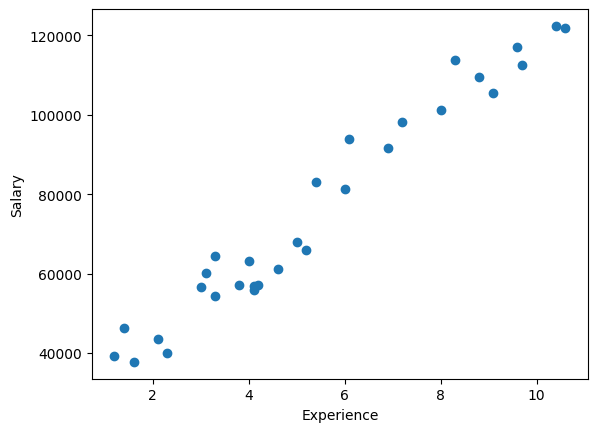

In [64]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Experience")
plt.ylabel("Salary")

In [65]:
X = df[['YearsExperience']]
Y = df['Salary']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()

In [69]:
lr.fit(X_train,Y_train)

LinearRegression()

In [70]:
X_test

,YearsExperience
1,1.4
0,1.2
14,4.6
9,3.8
21,7.2
19,6.1


In [71]:
Y_pred = lr.predict(X_test)
Y_pred

array([36834.63210301, 34920.71472592, 67457.3101364 , 59801.64062805,
       92338.23603852, 81811.69046455])

In [72]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print("R² Score:", r2)



R² Score: 0.8886956733784561


Text(0, 0.5, 'salary|')

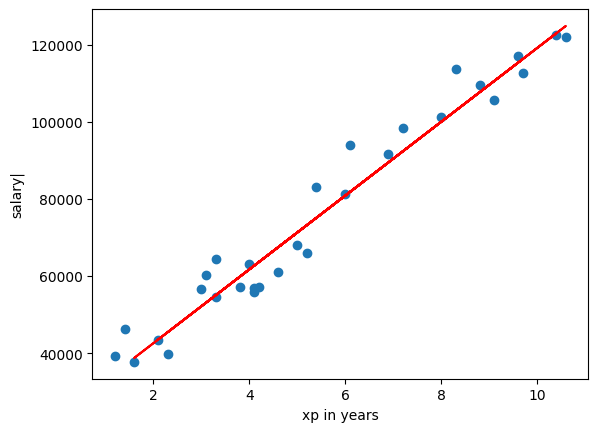

In [73]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('xp in years')
plt.ylabel('salary|')

In [74]:
m = lr.coef_
b = lr.intercept_

print(m,b)


[9569.58688543] 23437.21046340505


<p1>checking the calculations:<p1>

In [75]:
m * 1.2 + b

array([34920.71472592])

# LR from scratch

In [76]:
class NANOLR:
    def __init__(self):
        self.m = None #slope
        self.b = None #intercept

    
    def fit(self,X_train,Y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(Y_train[i] - Y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        self.m = num/den
        self.b = Y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    
    def predict(self,X_test):
        print(X_test)
        return self.m * X_test +self.b

In [77]:
Nlr = NANOLR()

In [78]:

print(type(Y_train))


<class 'pandas.core.series.Series'>


In [85]:
# Suppose you have a DataFrame df with columns 'YearsExperience' and 'Salary'

X = df['YearsExperience']        # pandas Series
Y = df['Salary']                 # pandas Series

# Convert to 1D NumPy arrays
X_np = X.values                  # 1D array
Y_np = Y.values                  # 1D array

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_np, Y_np, test_size=0.2, random_state=2)

# Create the object
Nlr = NANOLR()

# Fit the model
Nlr.fit(X_train, Y_train)

# Predict
y_pred = Nlr.predict(X_test)

print("Predictions:", y_pred)


9569.586885432866
23437.21046340505
[1.4 1.2 4.6 3.8 7.2 6.1]
Predictions: [36834.63210301 34920.71472592 67457.3101364  59801.64062805
 92338.23603852 81811.69046455]


In [93]:
A = Nlr.m * 7.2 + Nlr.b
print(A)


92338.23603852169
